## Design a stack with operations on middle element

How to implement a stack which will support the following operations in O(1) time complexity?

1) push() which adds an element to the top of stack.

2) pop() which removes an element from top of stack.

3) findMiddle() which will return middle element of the stack.

4) deleteMiddle() which will delete the middle element.

Push and pop are standard stack operations.


### Problems with using a Array: Deletion cannot be done in O(1) time.

### Method 1: use a stack made of  Double Linked List.

### Method 2: use a queue + stack combination.

https://www.geeksforgeeks.org/design-a-stack-with-find-middle-operation/


In [86]:
# https://www.geeksforgeeks.org/design-a-stack-with-find-middle-operation/
class DDL:

    def __init__(self, data, prev=None, next=None):

        self.data = data
        self.next = next
        self.prev = prev

class DDLStack:

    def __init__(self):
        self.head = None
        self.mid = None
        self.count = 0

    def push(self, x):

        new_node = DDL(data=x)

        if self.head == None:
           self.head = new_node
           self.count = 1
        else:
            self.head.next = new_node ### 1 -> 2
            new_node.prev = self.head ### 1 <- 2
            self.head = new_node ### head
            self.count += 1

        if self.count == 1:
            self.mid = self.head
        else:
            if self.count % 2 == 1:
                self.mid = self.mid.next

    def pop(self):

        if self.head == None:
            print('Stack UnderFlow')
            return -1

        x = self.head.data
        self.head = self.head.prev
        self.head.next = None
        self.count -= 1

        if self.count == 1:
            self.mid = self.head
        else:
            # self.deleteMiddle()
            ###new to update the mid.
            if self.count % 2 == 0:
                self.mid = self.mid.prev

        return x

    def findMiddle(self):
        print(f'\nmiddle: {self.mid.data} \n')

    def deleteMiddle(self):

        if self.mid == None:
            print('No Middle Element')
            return -1

        self.count -= 1
        ### there is an middle element.
        self.mid.prev.next = self.mid.next
        self.mid.next.prev = self.mid.prev

        if self.count % 2 == 1:
            self.mid = self.mid.next
        else:
            self.mid = self.mid.prev

    def print(self):

        tmp = self.head

        while tmp != None:

            print(tmp.data, end = ' -> ')

            tmp = tmp.prev


In [87]:
stack = DDLStack()

stack.push(1)
stack.push(2)
stack.push(3)

stack.print()
stack.findMiddle()
stack.push(4)
stack.findMiddle()
stack.push(5)
stack.findMiddle()
stack.print()

stack.push(6)
stack.push(7)
stack.findMiddle()
stack.push(8)
stack.findMiddle()

stack.push(9)
stack.findMiddle()

stack.print()

3 -> 2 -> 1 -> 
middle: 2 


middle: 2 


middle: 3 

5 -> 4 -> 3 -> 2 -> 1 -> 
middle: 4 


middle: 4 


middle: 5 

9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 

In [88]:
stack.deleteMiddle()

stack.print()

stack.findMiddle()

9 -> 8 -> 7 -> 6 -> 4 -> 3 -> 2 -> 1 -> 
middle: 4 



In [89]:
stack.pop()

stack.print()

stack.findMiddle()

8 -> 7 -> 6 -> 4 -> 3 -> 2 -> 1 -> 
middle: 4 



In [90]:
stack.pop()
stack.pop()
stack.pop()
stack.pop()

stack.print()

stack.findMiddle()

3 -> 2 -> 1 -> 
middle: 2 



## Method 2: Using a standard stack and a queue.

In [145]:
class Deque:

    def __init__(self):
        self.stack = []

    def push_front(self, x):
        self.stack = [x] + self.stack

    def push_end(self, x):
        self.stack.append(x)

    def pop_front(self):
        return self.stack.pop(0)

    def pop_end(self):
        return self.stack.pop()

    def print(self):
        print(self.stack)

    def __len__(self):
        return len(self.stack)

class MiddleStack:

    def __init__(self):

        self.deque = Deque()
        self.stack = []

    def push(self, x):

        self.deque.push_end(x)

        if len(self.deque) > 1 + len(self.stack):
            x = self.deque.pop_front()
            self.stack.append(x)

    def pop(self):

        x = self.deque.pop_end()

        while len(self.stack) > len(self.deque):
            self.deque.push_front(self.stack.pop())
            print('...')

        return x

    def findMiddle(self):

        print(f'\nMiddle Element: {self.deque.stack[0]}')

    def deleteMiddle(self):

        x = self.deque.pop_front()
        print('Deleted Middle Element: ', x)
        return x

    def print(self):
        print(self.stack, end=' ')
        self.deque.print()

In [146]:
m_stack = MiddleStack()

m_stack.push(1)
m_stack.push(2)
m_stack.push(3)

m_stack.print()
m_stack.findMiddle()

m_stack.push(4)
m_stack.push(5)
m_stack.push(6)

m_stack.print()
m_stack.findMiddle()

m_stack.push(7)
m_stack.findMiddle()
m_stack.print()

[1] [2, 3]

Middle Element: 2
[1, 2, 3] [4, 5, 6]

Middle Element: 4

Middle Element: 4
[1, 2, 3] [4, 5, 6, 7]


In [147]:
m_stack.deleteMiddle()
m_stack.print()
m_stack.findMiddle()

Deleted Middle Element:  4
[1, 2, 3] [5, 6, 7]

Middle Element: 5


In [148]:
print(m_stack.pop())

m_stack.print()

print(m_stack.pop())

m_stack.print()

...
7
[1, 2] [3, 5, 6]
6
[1, 2] [3, 5]


## Check the expression has valid or Balanced parenthesis or not.

https://www.geeksforgeeks.org/dsa-sheet-by-love-babbar/

In [ ]:
#User function Template for python3

class Solution:
    
    #Function to check if brackets are balanced or not.
    def ispar(self,x):
        
        ### there are three different types of brackets [], {}, ()
        ### if a bracket is open [, {, ( push to stack
        ### else if a ending bracket check if 
        ### if current x[i] is ], and stack[-1] is not [ return false. else pop stack.
        ### if stack is empty then return false )))) (only containing closing brackets)
        ### after iterating through x if stack is not empty then return  stack. eg. {{{{{ (constains only open brackets.)
        ### else at end return True.
        
        ### TC: O(N)
        ### SC: O(N) (for the stack)
        
        stack = []
        
        for i in x:
            
            if i in ['{', '[', '(']:
                stack.append(i)
            else:
                if stack == []: return False
                
                if (i == ']' and stack[-1] != '[') or (i == ')' and stack[-1] != '(') or (i == '}' and stack[-1] != '{'):
                    return False
                else:
                    stack.pop()
            
        
        if stack != []: return False
        
        return True
        

#{ 
 # Driver Code Starts
#Initial Template for Python 3

import atexit
import io
import sys

#Contributed by : Nagendra Jha


_INPUT_LINES = sys.stdin.read().splitlines()
input = iter(_INPUT_LINES).__next__
_OUTPUT_BUFFER = io.StringIO()
sys.stdout = _OUTPUT_BUFFER

@atexit.register

def write():
    sys.__stdout__.write(_OUTPUT_BUFFER.getvalue())


if __name__ == '__main__':
    test_cases = int(input())
    for cases in range(test_cases) :
        #n = int(input())
        #n,k = map(int,imput().strip().split())
        #a = list(map(int,input().strip().split()))
        s = str(input())
        obj = Solution()
        if obj.ispar(s):
            print("balanced")
        else:
            print("not balanced")
# } Driver Code Ends

##  Reverse a string using Stack

In [ ]:
def reverse(S):
    
    # return S[::-1]
    
    
    ### TC: O(N)
    ### SC: O(N)
    ###this can be thought of as reversing a arry as string is an array of chars.
    def reverse(arr):
        
        if len(arr) == 0:
            return arr
        
        x = arr[0]
        res = reverse(arr[1:])
        return res + x
    
    return reverse(S)
    
    ### TC: O(N)
    ### SC: O(N)
    
    # stack = []
    
    # for i in S:
    #     stack.append(i)
        
    # rev = ""
    # while stack:
    #     rev += stack.pop()
    
    # return rev
    
    #Add code here

#{ 
 # Driver Code Starts.
if __name__=='__main__':
    t=int(input())
    for i in range(t):
        str1=input()
        print(reverse(str1))
# } Driver Code Ends

## Design a stack that supports getMin() in O(1) time and O(1) extra space

Design a Data Structure SpecialStack that supports all the stack operations like push(), pop(), isEmpty(), isFull() and an additional operation getMin() which should return minimum element from the SpecialStack. All these operations of SpecialStack must have a time and space complexity of O(1).
Note: To implement SpecialStack, you should only use standard Stack data structure and no other data structure like arrays, lists, etc.

https://www.geeksforgeeks.org/design-a-stack-that-supports-getmin-in-o1-time-and-o1-extra-space/


Two equations used.
1. when pushing if the current element x is the new minimum then, x = 2 * x - mini, mini = x
2. while popping if the current element popped say x is the was the minimum then update the mini = 2 * mini - x.


In [ ]:
# Your task is to complete all these function's
# function should append an element on to the stack

mini = float('inf')

def push(arr, ele):
    global mini
    
    if arr == []:
        mini = ele
    elif mini > ele:
        mini = ele
        ele = 2 * ele - mini
        
    arr.append(ele)

# Function should pop an element from stack
def pop(arr):
    # Code here
    global mini
    
    if isEmpty(arr): return 
    
    x = arr.pop()
    
    if x < mini:
        mini = 2 * mini - x
    

# function should return 1/0 or True/False
def isFull(n, arr):
    # Code here
    return len(arr) == n
    

# function should return 1/0 or True/False
def isEmpty(arr):
    #Code here
    return arr == []

# function should return minimum element from the stack
def getMin(n, arr):
    # Code here
    return mini


#{ 
 # Driver Code Starts
if __name__=='__main__':
    t = int(input())
    for i in range(t):
        n = int(input())
        arr = list(map(int, input().strip().split()))
        stack = []
        while(not isEmpty(stack)):
            pop(stack)
            
        for i in range(n):
            push(stack, arr[i])
        print(getMin(n, stack))
# contributed by: Harshit Sidhwa

# } Driver Code Ends

## Next Greater Element

In [ ]:
#User function Template for python3


class Solution:
    
    def nextLargerElement(self,arr,n):
        
        ####for a given index find the greatest element to its right
        
        ### TC: O(N)
        ### SC: O(N)
        
        # stack = []
        # output = []
        
        # for i in range(n-1, -1, -1):
            
        #     while stack != [] and arr[i] >= stack[-1]:
                
        #         stack.pop()
            
        #     ### no next greater element.
        #     if stack == []:
        #         output.append(-1)
        #     else:
        #         output.append(stack[-1])
            
        #     stack.append(arr[i])
        
        # return output[::-1]
        
        ### to avoid doing the reversing lets iterate from 0 to n
        
        stack = [0]
        output = [-1] * n
        
        for i in range(1, n):
            
            while stack != [] and arr[stack[-1]] < arr[i]:
                idx = stack.pop()
                output[idx] = arr[i]
            
            stack.append(i)
        
        return output
        
        
        


#{ 
 # Driver Code Starts
#Initial Template for Python 3
import atexit
import io
import sys

_INPUT_LINES = sys.stdin.read().splitlines()
input = iter(_INPUT_LINES).__next__
_OUTPUT_BUFFER = io.StringIO()
sys.stdout = _OUTPUT_BUFFER

@atexit.register

def write():
    sys.__stdout__.write(_OUTPUT_BUFFER.getvalue())

if __name__ == '__main__':
    test_cases = int(input())
    for cases in range(test_cases) :
        n = int(input())

        a = list(map(int,input().strip().split()))
        obj = Solution()
        res = obj.nextLargerElement(a,n)
        for i in range (len (res)):
            print (res[i], end = " ")
        print ()
# } Driver Code Ends

### Celetraty Problem

In [5]:
#Function to find if there is a celebrity in the party or not.
def celebrity(M, n):
    
    ### find out how many all rows contains all zeros: These ppl dont know any.
    ### check which rows, is knows by all that is ur answer.
    
    ans = -1
    unknows = []
    
    ###find unknows people.
    for idx, i in enumerate(M):
        
        sum_ = 0
        for j in i:
            sum_ += j
        
        if sum_ == 0:
            unknows.append(idx)
    
    # print(unknows)
    
    for i in unknows:
        
        flag = True
        ###check if index i is 1 is all other rows.
        for row in range(n):
            # print(row, M[row][i], flag)
            if i != row and M[row][i] != 1:
                flag = False
                break
        
        if flag: return i
        
    return ans


M = [[0, 1, 0], [0, 0, 0], [0,1,0]]
celebrity(M, 3)

1

In [ ]:
#User function Template for python3

class Solution:
    
    #Function to find if there is a celebrity in the party or not.
    def celebrity(self, M, n):
        
        ### find out how many all rows contains all zeros: These ppl dont know any.
        ### check which rows, is knows by all that is ur answer.
        
        ## TC : 2 (N^2)
        ## SC : ~ O(1)
        
        # ans = -1
        # unknows = []
        
        # ###find unknows people.
        # for idx, i in enumerate(M):
            
        #     sum_ = 0
        #     for j in i:
        #         sum_ += j
            
        #     if sum_ == 0:
        #         unknows.append(idx)
        
        # # print(unknows)
        
        # for i in unknows:
            
        #     flag = True
        #     ###check if index i is 1 is all other rows.
        #     for row in range(n):
                
        #         if i != row and M[row][i] != 1:
        #             flag = False
        #             break
            
        #     if flag: return i
            
        # return ans
        
        ### Solving using garph. 
        ### using indegree and outedgree.
        ### indegree  ->  Node.
        ### outdegree Node -> 
        ### for an index i,j == 1 means i knows j so i -> j knows iindegree 
        ### i -> is outdegree connection
        ### -> j is an indegree connection
        
        ### TC : O(N^2)
        ### SC: O(2 * N)
        
        # ans = -1
        # indegree = [0 for i in range(n)]
        # outdegree = [0 for i in range(n)]
        
        # for i in range(n):
            
        #     for j in range(n):
                
        #         if M[i][j]:
                    
        #             indegree[j] += 1
        #             outdegree[i] += 1
        
        # ### for a celebraty indegree = 3 and outdegree == 0
        
        # # print(indegree)
        # # print(outdegree)
        
        # for i in range(n):
            
        #     if indegree[i] == n - 1 and outdegree[i] == 0:
        #         ans = i
        
        # return ans
        
        ### TC: O(N)
        ### SC: O(N)
        #### recursion limit exceeded.
        # def worker(n):
            
        #     if n == 0: return 0
            
        #     idx = worker(n-1)
            
        #     ###no celebraty exists still idx, check for n and later.
        #     if idx == -1:
        #         return n
        #     #this means idx knows n, idx cannot be celebraty.
        #     if M[idx][n]:
        #         return n
        #     #this means n knows idx, n cannot be celebraty.    
        #     elif M[n][idx]:
        #         return idx
            
        #     return -1
        
        # celebraty = worker(n-1)
        
        # if celebraty == -1: return -1
        
        # count = 0
        # for i in range(n):
        #     if M[i][celebraty]:
        #         count += 1
        
        # if count == n - 1: return celebraty
        
        # return -1
        
        # ans = -1
        # stack = []
        
        # for i in range(n):
        #     stack.append(i)
            
        # while len(stack) > 1:
            
        #     a = stack.pop()
        #     b = stack.pop()
            
        #     ### neither A or B can be celebraties
        #     if M[a][b] and M[b][a]: continue
            
        #     if M[a][b]:
        #         stack.append(b)
        #     else:
        #         stack.append(a)
        
        # if stack == []: return -1
        
        # candidate = stack[0]
        
        # for i in range(n):
              ### check if candidate knows anyone or if anyone doesnt know the candidate if true return false.
        #     if i != candidate and (M[candidate][i] or not M[i][candidate]): return -1
        
        # return candidate

#{ 
 # Driver Code Starts
#Initial Template for Python 3

if __name__ == '__main__':
    t = int(input())
    for _ in range(t) :
        n = int(input())
        a = list(map(int,input().strip().split()))
        k = 0
        m = []
        for i in range(n):
            row = []
            for j in range(n):
                row.append(a[k])
                k+=1
            m.append(row)
        ob = Solution()
        print(ob.celebrity(m,n))
# } Driver Code Ends

## Arithmetic Expression Evaluation

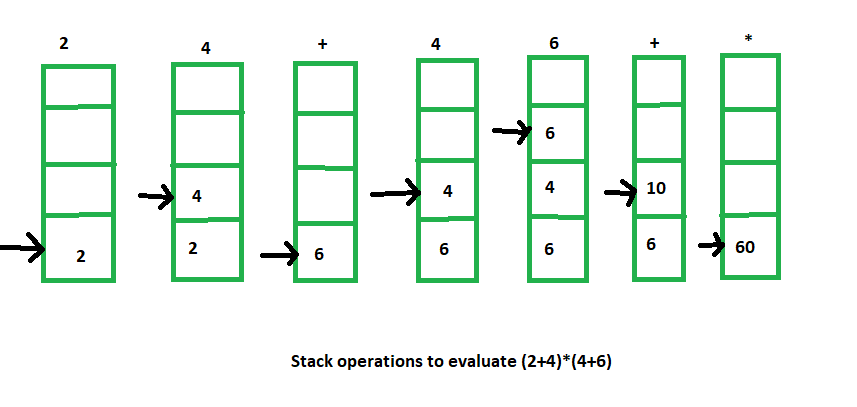